# Install NVIDIA Container Toolkit

In [1]:
!curl -fsSL https://nvidia.github.io/libnvidia-container/gpgkey | sudo gpg --dearmor -o /usr/share/keyrings/nvidia-container-toolkit-keyring.gpg \
  && curl -s -L https://nvidia.github.io/libnvidia-container/stable/deb/nvidia-container-toolkit.list | \
    sed 's#deb https://#deb [signed-by=/usr/share/keyrings/nvidia-container-toolkit-keyring.gpg] https://#g' | \
    sudo tee /etc/apt/sources.list.d/nvidia-container-toolkit.list

!apt-get update

deb [signed-by=/usr/share/keyrings/nvidia-container-toolkit-keyring.gpg] https://nvidia.github.io/libnvidia-container/stable/deb/$(ARCH) /
#deb [signed-by=/usr/share/keyrings/nvidia-container-toolkit-keyring.gpg] https://nvidia.github.io/libnvidia-container/experimental/deb/$(ARCH) /
Get:1 https://nvidia.github.io/libnvidia-container/stable/deb/amd64  InRelease [1,477 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://nvidia.github.io/libnvidia-container/stable/deb/amd64  Packages [16.7 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,312 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy

# Install TensorRT-LLM

In [2]:
!git clone https://github.com/NVIDIA/TensorRT-LLM/

Cloning into 'TensorRT-LLM'...
remote: Enumerating objects: 38685, done.
remote: Counting objects: 100% (557/557), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 38685 (delta 379), reused 348 (delta 293), pack-reused 38128 (from 2)
Receiving objects: 100% (38685/38685), 619.17 MiB | 16.78 MiB/s, done.
Resolving deltas: 100% (27960/27960), done.
Updating files: 100% (4699/4699), done.
Filtering content: 100% (16/16), 567.47 MiB | 65.47 MiB/s, done.


In [3]:
!sudo apt-get install python3.10
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --set python3 /usr/bin/python3.10

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.10 is already the newest version (3.10.12-1~22.04.8).
python3.10 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
update-alternatives: using /usr/bin/python3.10 to provide /usr/bin/python3 (python3) in manual mode


In [131]:
!apt-get update && apt-get -y install python3.10 python3-pip openmpi-bin libopenmpi-dev
!pip install tensorrt_llm -U --pre --extra-index-url https://pypi.nvidia.com

In [ ]:
# !python3 -c "import tensorrt_llm"

[TensorRT-LLM] TensorRT-LLM version: 0.17.0.dev2024121700


In [ ]:
# !ls

sample_data  TensorRT-LLM


# Download Bloom

In [ ]:
# !pip install -r TensorRT-LLM/examples/bloom/requirements.txt
!pip install tensorrt_llm>=0.0.dev0 datasets~=2.14.5 evaluate rouge_score sentencepiece>=0.1.99

In [5]:
BLOOM_PATH="TensorRT-LLM/examples/bloom"

!rm -rf $BLOOM_PATH/560M
!mkdir -p $BLOOM_PATH/560M && git clone https://huggingface.co/bigscience/bloom-560m $BLOOM_PATH/560M

Cloning into 'TensorRT-LLM/examples/bloom/560M'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 111 (delta 0), reused 0 (delta 0), pack-reused 98 (from 1)
Receiving objects: 100% (111/111), 29.15 KiB | 14.57 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Filtering content: 100% (11/11), 12.27 GiB | 72.78 MiB/s, done.


# Convert and Build

In [9]:
# default
!python3 $BLOOM_PATH/convert_checkpoint.py --model_dir $BLOOM_PATH/560M/ \
                --dtype float16 \
                --output_dir $BLOOM_PATH/560M/trt_ckpt/fp16/1-gpu/

!trtllm-build --checkpoint_dir $BLOOM_PATH/560M/trt_ckpt/fp16/1-gpu/ \
                --gemm_plugin float16 \
                --output_dir $BLOOM_PATH/560M/trt_engines/fp16/1-gpu/

[TensorRT-LLM] TensorRT-LLM version: 0.17.0.dev2024121700
0.17.0.dev2024121700
[02/13/2025-03:17:59] [TRT-LLM] [I] Convert by using checkpoint
[02/13/2025-03:17:59] [TRT-LLM] [I] Loading weights from HF BLOOM...
Rank [0] Loading weights: 100% 1/1 [00:00<00:00, 10.78it/s]
[02/13/2025-03:17:59] [TRT-LLM] [I] Weights loaded. Total time: 00:00:00
Total time of converting checkpoints: 00:00:02
[TensorRT-LLM] TensorRT-LLM version: 0.17.0.dev2024121700
[02/13/2025-03:18:07] [TRT-LLM] [I] Set bert_attention_plugin to auto.
[02/13/2025-03:18:07] [TRT-LLM] [I] Set gpt_attention_plugin to auto.
[02/13/2025-03:18:07] [TRT-LLM] [I] Set gemm_plugin to float16.
[02/13/2025-03:18:07] [TRT-LLM] [I] Set gemm_swiglu_plugin to None.
[02/13/2025-03:18:07] [TRT-LLM] [I] Set fp8_rowwise_gemm_plugin to None.
[02/13/2025-03:18:07] [TRT-LLM] [I] Set nccl_plugin to auto.
[02/13/2025-03:18:07] [TRT-LLM] [I] Set lora_plugin to None.
[02/13/2025-03:18:07] [TRT-LLM] [I] Set moe_plugin to auto.
[02/13/2025-03:18:07] 

In [10]:
# int8 weight
!python3 $BLOOM_PATH/convert_checkpoint.py --model_dir $BLOOM_PATH/560M \
                --dtype float16 \
                --use_weight_only \
                --output_dir $BLOOM_PATH/560M/trt_ckpt/int8_weight_only/1-gpu/

!trtllm-build --checkpoint_dir $BLOOM_PATH/560M/trt_ckpt/int8_weight_only/1-gpu/ \
                --gemm_plugin float16 \
                --output_dir $BLOOM_PATH/560M/trt_engines/int8_weight_only/1-gpu/

[TensorRT-LLM] TensorRT-LLM version: 0.17.0.dev2024121700
0.17.0.dev2024121700
[02/13/2025-03:18:26] [TRT-LLM] [I] Convert by using model
The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.
Weights loaded. Total time: 00:00:05
Total time of converting checkpoints: 00:00:08
[TensorRT-LLM] TensorRT-LLM version: 0.17.0.dev2024121700
[02/13/2025-03:18:41] [TRT-LLM] [I] Set bert_attention_plugin to auto.
[02/13/2025-03:18:41] [TRT-LLM] [I] Set gpt_attention_plugin to auto.
[02/13/2025-03:18:41] [TRT-LLM] [I] Set gemm_plugin to float16.
[02/13/2025-03:18:41] [TRT-LLM] [I] Set gemm_swiglu_plugin to None.
[02/13/2025-03:18:41] [TRT-LLM] [I] Set fp8_rowwise_gemm_plugin to None.
[02/13/2025-03:18:41] [TRT-LLM] [I] Set nccl_plugin to auto.
[02/13/2025-03:18:41] [TRT-LLM] [I] Set lora_plugin to None.
[02/13/2025-03:18:41] [TRT-LLM] [I] Set moe_plugin to auto.
[02/13/2025-03:18:41] [TRT-LLM] [I] Set mamba_conv1d_plugin to auto.
[02/13/2025-03:18:4

In [13]:
# int4 weight
!python3 $BLOOM_PATH/convert_checkpoint.py --model_dir $BLOOM_PATH/560M \
                --dtype float16 \
                --use_weight_only \
                --weight_only_precision int4 \
                --output_dir $BLOOM_PATH/560M/trt_ckpt/int4_weight_only/1-gpu/

!trtllm-build --checkpoint_dir $BLOOM_PATH/560M/trt_ckpt/int4_weight_only/1-gpu/ \
                --gemm_plugin float16 \
                --output_dir $BLOOM_PATH/560M/trt_engines/int4_weight_only/1-gpu/

In [48]:
# # int8 weight + int8 kv cache
# !python3 $BLOOM_PATH/convert_checkpoint.py --model_dir $BLOOM_PATH/560M \
#                 --dtype float16 \
#                 --use_weight_only \
#                 --int8_kv_cache \
#                 --output_dir $BLOOM_PATH/560M/trt_ckpt/int8/1-gpu/
# !trtllm-build --checkpoint_dir $BLOOM_PATH/560M/trt_ckpt/int8/1-gpu/ \
#                 --gemm_plugin float16 \
#                 --output_dir $BLOOM_PATH/560M/trt_ckpt/int8/1-gpu/

In [49]:
# int4 weight + int8 kv cache
# !python3 $BLOOM_PATH/convert_checkpoint.py --model_dir $BLOOM_PATH/560M \
#                 --dtype float16 \
#                 --use_weight_only \
#                 --weight_only_precision int4 \
#                 --int8_kv_cache \
#                 --output_dir $BLOOM_PATH/560M/trt_ckpt/int4_weight_int8_kv/1-gpu/
# ! trtllm-build --checkpoint_dir $BLOOM_PATH/560M/trt_ckpt/int4_weight_int8_kv/1-gpu/ \
#                 --gemm_plugin float16 \
#                 --output_dir .$BLOOM_PATH/560M/trt_ckpt/int4_weight_int8_kv/1-gpu/

# Benchmark

In [27]:
%%capture bloom_hf_results
!time python3 $BLOOM_PATH/../summarize.py --test_hf \
                       --hf_model_dir $BLOOM_PATH/560M/ \
                       --data_type fp16 \
                       --engine_dir $BLOOM_PATH/560M/trt_engines/fp16/1-gpu/

In [28]:
%%capture bloom_trt_results
!time python3 $BLOOM_PATH/../summarize.py --test_trt_llm \
                       --hf_model_dir $BLOOM_PATH/560M/ \
                       --data_type fp16 \
                       --engine_dir $BLOOM_PATH/560M/trt_engines/fp16/1-gpu/

In [29]:
%%capture bloom_int8_weight_only_results
!time python3 $BLOOM_PATH/../summarize.py --test_trt_llm \
                       --hf_model_dir $BLOOM_PATH/560M/ \
                       --data_type fp16 \
                       --engine_dir $BLOOM_PATH/560M/trt_engines/int8_weight_only/1-gpu/

In [30]:
%%capture bloom_int4_weight_only_results
!time python3 $BLOOM_PATH/../summarize.py --test_trt_llm \
                       --hf_model_dir $BLOOM_PATH/560M/ \
                       --data_type fp16 \
                       --engine_dir $BLOOM_PATH/560M/trt_engines/int4_weight_only/1-gpu/

In [60]:
print(bloom_hf_results())

[TensorRT-LLM] TensorRT-LLM version: 0.17.0.dev2024121700
[02/13/2025-03:39:29] [TRT-LLM] [I] Load tokenizer takes: 1.0151162147521973 sec
The class `optimum.bettertransformers.transformation.BetterTransformer` is deprecated and will be removed in a future release.
Instantiating BloomAttentionLayerBetterTransformer without passing a `layer_idx` is not recommended and will lead to errors during the forward call if caching is used. Please make sure to provide a `layer_idx` when creating this class.
The BetterTransformer implementation does not support padding during training, as the fused kernels do not support attention masks. Beware that passing padded batched data during training may result in unexpected outputs. Please refer to https://huggingface.co/docs/optimum/bettertransformer/overview for more details.
[02/13/2025-03:39:34] [TRT-LLM] [I] Load HF model takes: 0.6965329647064209 sec
From v4.47 onwards, when a model cache is to be returned, `generate` will return a `Cache` instance

In [50]:
# Example output captured
print(bloom_trt_results())

[TensorRT-LLM] TensorRT-LLM version: 0.17.0.dev2024121700
[02/13/2025-03:40:26] [TRT-LLM] [I] Load tokenizer takes: 1.0257225036621094 sec
[TensorRT-LLM][INFO] Engine version 0.17.0.dev2024121700 found in the config file, assuming engine(s) built by new builder API.
[02/13/2025-03:40:30] [TRT-LLM] [I] Using C++ session
[TensorRT-LLM][INFO] Engine version 0.17.0.dev2024121700 found in the config file, assuming engine(s) built by new builder API.
[TensorRT-LLM][INFO] MPI size: 1, MPI local size: 1, rank: 0
[TensorRT-LLM][INFO] Engine version 0.17.0.dev2024121700 found in the config file, assuming engine(s) built by new builder API.
[TensorRT-LLM][INFO] Refreshed the MPI local session
[TensorRT-LLM][INFO] MPI size: 1, MPI local size: 1, rank: 0
[TensorRT-LLM][INFO] Rank 0 is using GPU 0
[TensorRT-LLM][WARNING] Fix optionalParams : KV cache reuse disabled because model was not built with paged context FMHA support
[TensorRT-LLM][INFO] TRTGptModel maxNumSequences: 1
[TensorRT-LLM][INFO] TRT

In [51]:
import re

def parse_output(output):
    # Extracting execution time
    time_match = re.search(r'real\s+(\d+)m([\d.]+)s', output.stdout)
    if time_match:
        minutes = int(time_match.group(1))
        seconds = float(time_match.group(2))
        exec_time = minutes * 60 + seconds
    else:
        exec_time = None

    rouge_scores = re.findall(r'rouge[12Lsum]+ : ([\d.]+)', output.stdout)
    rouge_scores = [float(score) for score in rouge_scores] if rouge_scores else []

    latency_match = re.search(r'total latency: ([\d.]+) sec', output.stdout)
    latency = float(latency_match.group(1)) if latency_match else None

    tokens_match = re.search(r'total output tokens: (\d+)', output.stdout)
    total_tokens = int(tokens_match.group(1)) if tokens_match else None

    tokens_per_sec_match = re.search(r'tokens per second: ([\d.]+)', output.stdout)
    tokens_per_sec = float(tokens_per_sec_match.group(1)) if tokens_per_sec_match else None

    return exec_time, rouge_scores, latency, total_tokens, tokens_per_sec

In [62]:
# For bloom_hf_results
bloom_hf_exec_time, bloom_hf_rouge, bloom_hf_latency, bloom_hf_tokens, bloom_hf_tokens_per_sec = parse_output(bloom_hf_results)

# Only TensorRT-LLM optimized models have Tokens/s, latency, and total tokens
bloom_trt_exec_time, bloom_trt_rouge, bloom_trt_latency, bloom_trt_tokens, bloom_trt_tokens_per_sec = parse_output(bloom_trt_results)
bloom_int8_exec_time, bloom_int8_rouge, bloom_int8_latency, bloom_int8_tokens, bloom_int8_tokens_per_sec = parse_output(bloom_int8_weight_only_results)
bloom_int4_exec_time, bloom_int4_rouge, bloom_int4_latency, bloom_int4_tokens, bloom_int4_tokens_per_sec = parse_output(bloom_int4_weight_only_results)

Text(0.5, 0, 'Model')

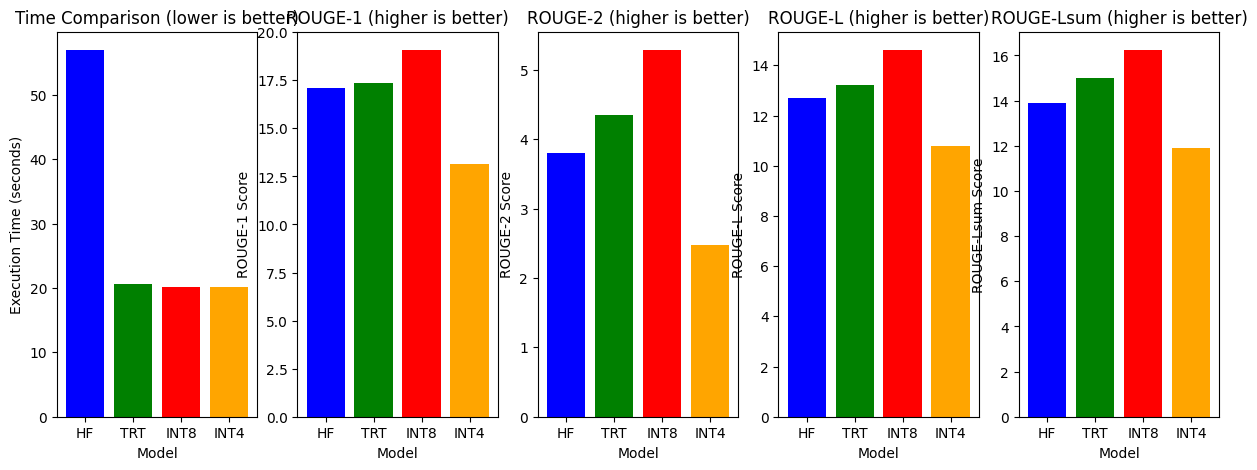

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

# Execution times and Rouge Scores
exec_times = [bloom_hf_exec_time, bloom_trt_exec_time, bloom_int8_exec_time, bloom_int4_exec_time]
models = ['HF', 'TRT', 'INT8', 'INT4']
colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(15, 5))

# Plotting execution times
plt.subplot(1, 5, 1)
plt.bar(models, exec_times, color=colors)
plt.title('Time Comparison (lower is better)')
plt.ylabel('Execution Time (seconds)')
plt.xlabel('Model')

# Plotting ROUGE-1 scores
rouge1_scores = [bloom_hf_rouge[0], bloom_trt_rouge[0], bloom_int8_rouge[0], bloom_int4_rouge[0]]
plt.subplot(1, 5, 2)
plt.bar(models, rouge1_scores, color=colors)
plt.title('ROUGE-1 (higher is better)')
plt.ylabel('ROUGE-1 Score')
plt.xlabel('Model')

# Plotting ROUGE-2 scores
rouge_lsum_scores = [bloom_hf_rouge[2], bloom_trt_rouge[2], bloom_int8_rouge[2], bloom_int4_rouge[2]]
plt.subplot(1, 5, 3)
plt.bar(models, rouge_lsum_scores, color=colors)
plt.title('ROUGE-2 (higher is better)')
plt.ylabel('ROUGE-2 Score')
plt.xlabel('Model')

# Plotting ROUGE-L scores
rouge_lsum_scores = [bloom_hf_rouge[4], bloom_trt_rouge[4], bloom_int8_rouge[4], bloom_int4_rouge[4]]
plt.subplot(1, 5, 4)
plt.bar(models, rouge_lsum_scores, color=colors)
plt.title('ROUGE-L (higher is better)')
plt.ylabel('ROUGE-L Score')
plt.xlabel('Model')

# Plotting ROUGE-Lsum scores
rouge_lsum_scores = [bloom_hf_rouge[6], bloom_trt_rouge[6], bloom_int8_rouge[6], bloom_int4_rouge[6]]
plt.subplot(1, 5, 5)
plt.bar(models, rouge_lsum_scores, color=colors)
plt.title('ROUGE-Lsum (higher is better)')
plt.ylabel('ROUGE-Lsum Score')
plt.xlabel('Model')

In [81]:
print([bloom_hf_exec_time, bloom_trt_exec_time, bloom_int8_exec_time, bloom_int4_exec_time])
print([bloom_hf_rouge[0], bloom_trt_rouge[0], bloom_int8_rouge[0], bloom_int4_rouge[0]])
print([bloom_hf_rouge[2], bloom_trt_rouge[2], bloom_int8_rouge[2], bloom_int4_rouge[2]])
print([bloom_hf_rouge[4], bloom_trt_rouge[4], bloom_int8_rouge[4], bloom_int4_rouge[4]])
print([bloom_hf_rouge[6], bloom_trt_rouge[6], bloom_int8_rouge[6], bloom_int4_rouge[6]])

[56.97, 20.576, 20.217, 20.177]
[17.095172727418873, 17.33843040873399, 19.074609358061146, 13.125924945274017]
[3.795699715902623, 4.353159039416418, 5.282891075286857, 2.480766718024665]
[12.717086602427196, 13.207068327346175, 14.608177414082293, 10.773874970318579]
[13.877992130282074, 14.984333067074123, 16.237407607256692, 11.912078543309276]


Text(0.5, 0, 'Model')

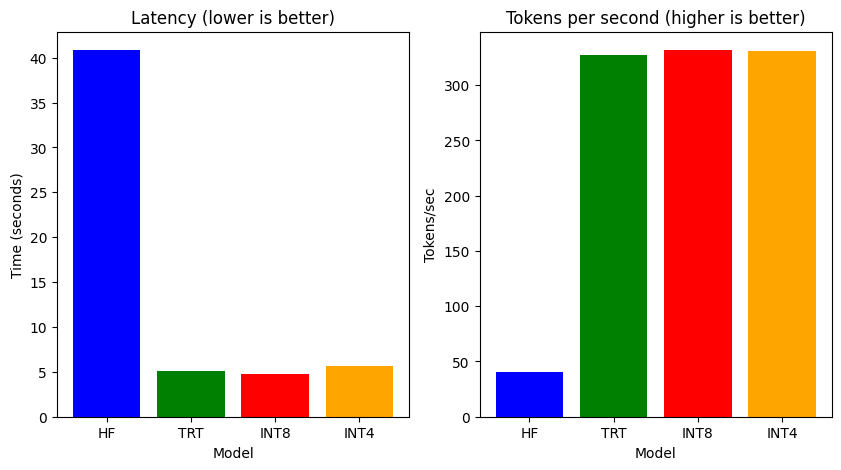

In [63]:
# Latency and Tokens per Sec
latencies = [bloom_hf_latency, bloom_trt_latency, bloom_int8_latency, bloom_int4_latency]
tps = [bloom_hf_tokens_per_sec, bloom_trt_tokens_per_sec, bloom_int8_tokens_per_sec, bloom_int4_tokens_per_sec]
plt.figure(figsize=(10, 5))

# Plotting latency times
plt.subplot(1, 2, 1)
plt.bar(models, latencies, color=colors)
plt.title('Latency (lower is better)')
plt.ylabel('Time (seconds)')
plt.xlabel('Model')

# Plotting tokens per seconds
plt.subplot(1, 2, 2)
plt.bar(models, tps, color=colors)
plt.title('Tokens per second (higher is better)')
plt.ylabel('Tokens/sec')
plt.xlabel('Model')

In [82]:
print(latencies)
print(tps)

[40.845093965530396, 5.12476658821106, 4.788208484649658, 5.609415769577026]
[40.59239039575239, 327.4295465202352, 331.8568949313959, 330.6939753085685]


In [68]:
%%capture bloom_int8_batch_size_1_results
!time python3 $BLOOM_PATH/../summarize.py --test_trt_llm \
                       --hf_model_dir $BLOOM_PATH/560M/ \
                       --batch_size 1 \
                       --data_type fp16 \
                       --engine_dir $BLOOM_PATH/560M/trt_engines/int8_weight_only/1-gpu/

In [118]:
%%capture bloom_int8_batch_size_64_ttft_results
!time python3 $BLOOM_PATH/../summarize.py --test_trt_llm \
                       --hf_model_dir $BLOOM_PATH/560M/ \
                       --batch_size 64 \
                       --data_type fp16 \
                       --output_len 1 --engine_dir $BLOOM_PATH/560M/trt_engines/int8_weight_only/1-gpu/

In [100]:
%%capture bloom_int8_batch_size_32_results
!time python3 $BLOOM_PATH/../summarize.py --test_trt_llm \
                       --hf_model_dir $BLOOM_PATH/560M/ \
                       --batch_size 32 \
                       --data_type fp16 \
                       --engine_dir $BLOOM_PATH/560M/trt_engines/int8_weight_only/1-gpu/

In [75]:
bs_1_exec_time, bs_1_rouge, bs_1_latency, bs_1_tokens, bs_1_tokens_per_sec = parse_output(bloom_int8_batch_size_1_results)
bs_2_exec_time, bs_2_rouge, bs_2_latency, bs_2_tokens, bs_2_tokens_per_sec = parse_output(bloom_int8_batch_size_2_results)
bs_4_exec_time, bs_4_rouge, bs_4_latency, bs_4_tokens, bs_4_tokens_per_sec = parse_output(bloom_int8_batch_size_4_results)
bs_8_exec_time, bs_8_rouge, bs_8_latency, bs_8_tokens, bs_8_tokens_per_sec = parse_output(bloom_int8_batch_size_8_results)
bs_16_exec_time, bs_16_rouge, bs_16_latency, bs_16_tokens, bs_16_tokens_per_sec = parse_output(bloom_int8_batch_size_16_results)
bs_32_exec_time, bs_32_rouge, bs_32_latency, bs_32_tokens, bs_32_tokens_per_sec = parse_output(bloom_int8_batch_size_32_results)
bs_64_exec_time, bs_64_rouge, bs_64_latency, bs_64_tokens, bs_64_tokens_per_sec = parse_output(bloom_int8_batch_size_64_results)

In [84]:
[bs_1_tokens_per_sec, bs_2_tokens_per_sec, bs_4_tokens_per_sec, bs_8_tokens_per_sec, bs_16_tokens_per_sec, bs_32_tokens_per_sec, bs_64_tokens_per_sec, bs_128_tokens_per_sec, bs_256_tokens_per_sec]

[331.5600738085986,
 553.4985956443181,
 937.1651275973113,
 1540.0512241564004,
 2466.5301727095966,
 3641.288504346288,
 4803.227845267365,
 5888.262246845619,
 6413.5573808859435]

In [89]:
[bs_1_latency, bs_2_latency, bs_4_latency, bs_8_latency, bs_16_latency, bs_32_latency, bs_64_latency, bs_128_latency, bs_256_latency]

[4.792495012283325,
 5.721785068511963,
 6.333995819091797,
 8.095185279846191,
 10.029879331588745,
 13.808848142623901,
 21.328782081604004,
 37.29368543624878,
 70.49285960197449]